In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

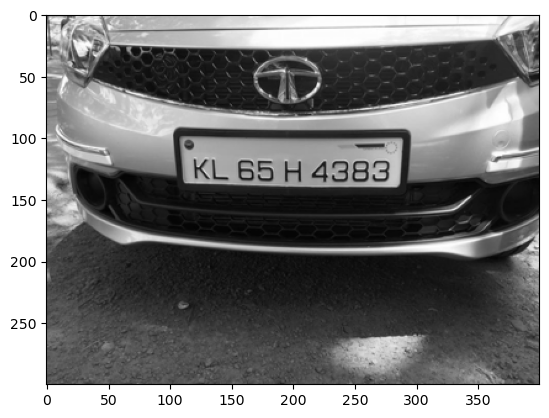

In [16]:
img = cv2.imread('Cars212.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

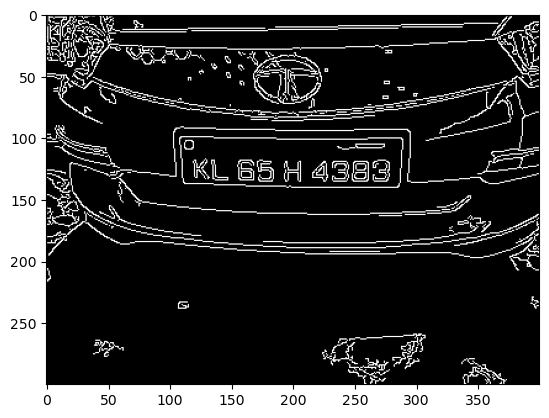

In [17]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) # Noise Reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge Detection using Canny Algorithm
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [18]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints) # Revealing contours to find the boundary co-ordinates
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [19]:
location = None # Initializing the Varaiable
for contour in contours: # Using Contours to find the boundary of the number plate
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4: # Using 4 because we are looking for a rectangle shape
    location = approx
    break

In [20]:
location

array([[[108, 100]],

       [[112, 137]],

       [[287, 136]],

       [[288, 100]]], dtype=int32)

In [21]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask) 

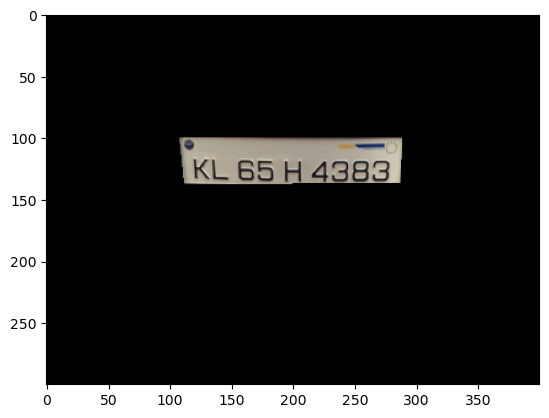

In [22]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [23]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

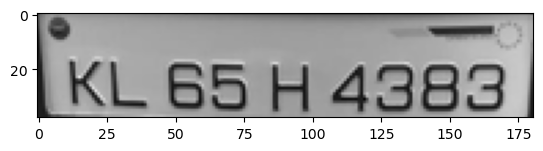

In [24]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [25]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)

req_result = result[0][1]
req_result = req_result.upper()
req_result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[8, 12], [176, 12], [176, 38], [8, 38]], 'KL 65 H4383', 0.9782241054168039)]


'KL 65 H4383'

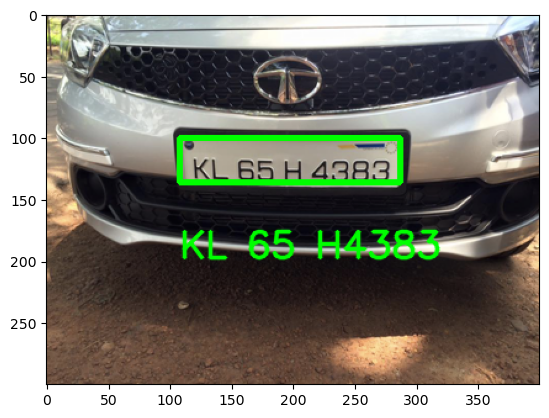

In [26]:
# Displaying the data read by EasyOCR
text = req_result
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))